# Exploratory data analysis of the Steam dataset

Dataset from: https://www.kaggle.com/tamber/steam-video-games

### Dataset description (from the dataset author):
Steam is the world's most popular PC Gaming hub. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools can be super valuable for Steam. How can we make them better?

This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

### Basic modifications

The value for the `purchase` is always 1. Since it is redundant we can delete all `purchase`, and therefore the `behavior-name` column as well. We will call `value`, `playtime` instead. 

In [1]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from time import time
import contextlib

@contextlib.contextmanager
def timer(msg):
    tic = time()
    yield
    print(msg + ": %.2f s" % (time() - tic))

In [9]:
# Load

score_df = pd.read_csv("./Data/Steam/Processed/score.csv",index_col=0)
playtime_df = pd.read_csv("./Data/Steam/Processed/playtime.csv",index_col=0)
user_df = pd.read_csv("./Data/Steam/Processed/user.csv",index_col=0)
game_df = pd.read_csv("./Data/Steam/Processed/game.csv",index_col=0)
# score_df = pd.read_csv("./Data/Steam/Processed/score.csv")
# df.drop(np.argwhere((df['behavior-name']=='purchase').values)[:,0], axis=0, inplace=True)
# df.drop('behavior-name',axis=1,inplace=True)

# Exploratory data analysis

Visualize some distributions

- Histogram of total playtime per user
- Histogram of average playtime per game per user (i.e. totalplaytime/number of games for each user)
    - That can be used to separate customer into different categories, e.g. casual vs core-game
- Histogram of total playtime per game
- Histogram of average playtime per game
- Histogram of number of users per game
- Histogram of number of game per user

Make new dataframes:

# Total playtime of users

Text(0.5, 1.0, 'Histogram of log10(playtime) across users, count=number of users')

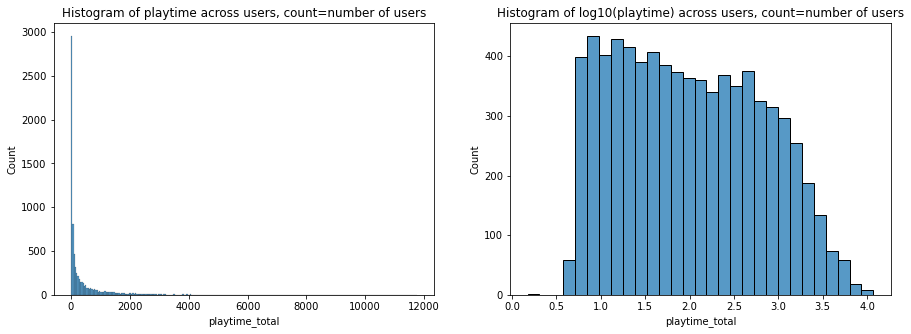

In [3]:
fix, ax = plt.subplots(1,2,figsize=[15,5])
plt.sca(ax[0])
sns.histplot(data=user_df,x=user_df['playtime_total'])
plt.title('Histogram of playtime across users, count=number of users')
plt.sca(ax[1])
sns.histplot(data=user_df,x=np.log10(user_df['playtime_total']))
plt.title('Histogram of log10(playtime) across users, count=number of users')

### Breakdown of this plot

[WIP] should be done on the whole dataset

# Which user has the most playtime?

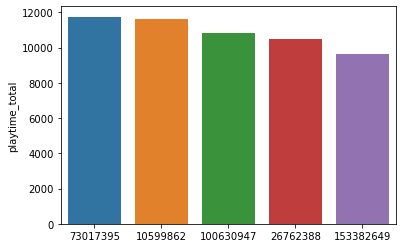

In [4]:
temp = user_df.sort_values('playtime_total',ascending=False).iloc[:5]
sns.barplot(data=temp,x=temp.index,y='playtime_total',order=temp.index)
biggest_gamers_list = temp.index

## What are the favorite games of these users?

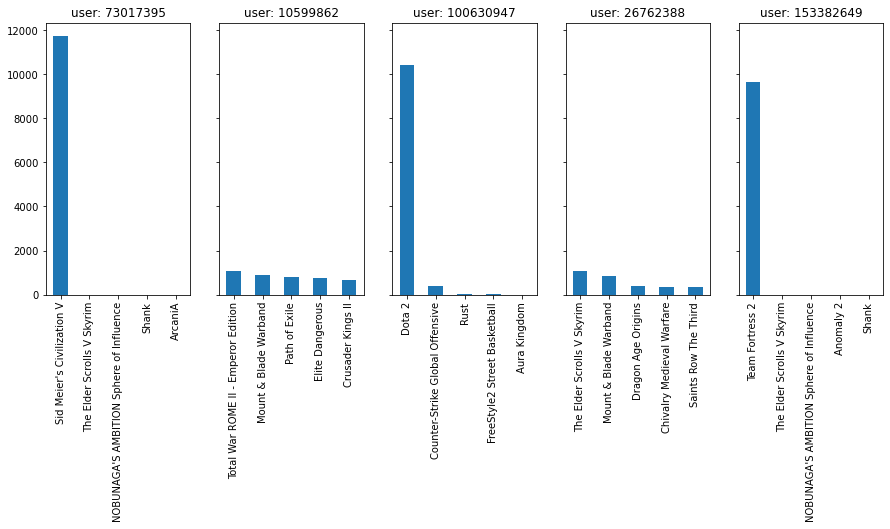

In [5]:
temp = playtime_df.loc[biggest_gamers_list]

fig, ax = plt.subplots(1,5,figsize=[15,5],sharey=True)
for i, user in enumerate(temp.index):
    plt.sca(ax[i])
#     sns.barplot(data=temp.loc[user].sort_values(ascending=False)[:5])
    data=temp.loc[user].sort_values(ascending=False)[:5].plot.bar()
    plt.title(f'user: {user}')
# sns.catplot(kind='bar',data=temp)

### Breakdown

We can already identify several profiles among gamers with high total playtime. Some play a single game for a lot of time, while others play many games for a shorter duration. The biggest playtimes (>1000 hours) are for online competitive games such as *Team Fortress 2* or *Dota 2*. Gamers who divide their time amongst many title (with <100 hours) tend to play single player games.

In [6]:
temp.loc[user].sort_values(ascending=False)[:5]

Team Fortress 2                            9640.0
The Elder Scrolls V Skyrim                    0.0
NOBUNAGA'S AMBITION Sphere of Influence       0.0
Anomaly 2                                     0.0
Shank                                         0.0
Name: 153382649, dtype: float64

# Explore games

## Most owned and longest played games

In [7]:
game_df.head()

,num_game,playtime_total,playtime_000,playtime_p025,playtime_p050,playtime_p075,playtime_p100
151603712,26,439.9,0.1,0.50,1.35,7.950,273.0
59945701,21,467.3,0.1,0.70,3.40,10.200,238.0
53875128,180,1335.1,0.1,0.50,1.85,7.925,86.0
140954425,1,13.0,13.0,13.00,13.00,13.000,13.0
26122540,7,182.3,1.1,4.95,10.30,34.500,92.0


<AxesSubplot:title={'center':'average playtime (playtime_total/num_user)'}, xlabel='0'>

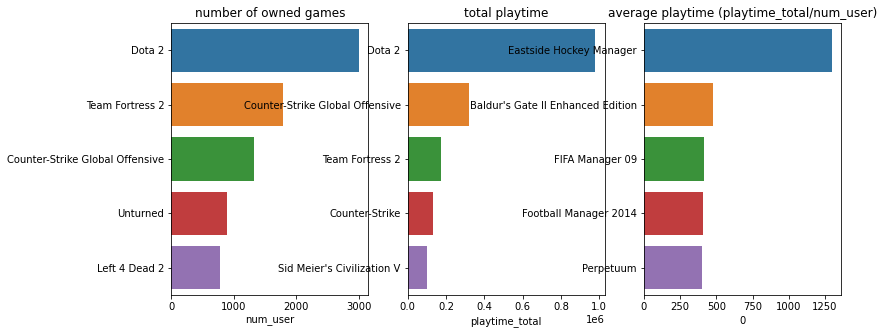

In [10]:
# game_df['num_user'].sort_values(ascending=False)[:5].plot.bar()

fig, ax = plt.subplots(1,3,figsize=[12,5])
plt.sca(ax[0])
temp = pd.DataFrame(game_df['num_user'].sort_values(ascending=False)[:5])
sns.barplot(data=temp,y=temp.index, x='num_user')
plt.title('number of owned games')
plt.sca(ax[1])
temp = pd.DataFrame(game_df['playtime_total'].sort_values(ascending=False)[:5])
sns.barplot(data=temp,y=temp.index, x='playtime_total')
plt.title('total playtime')
plt.sca(ax[2])
temp = pd.DataFrame((game_df['playtime_total']/game_df['num_user']).sort_values(ascending=False)[:5])
plt.title('average playtime (playtime_total/num_user)')
sns.barplot(data=temp,y=temp.index, x=0)

### Breakdown

In [22]:
game_df[game_df['num_user']>20]

,num_user,playtime_total,playtime_000,playtime_p025,playtime_p050,playtime_p075,playtime_p100
The Elder Scrolls V Skyrim,663,70863.7,0.1,9.250,48.00,128.50,1986.0
Fallout 4,165,10756.4,0.2,21.000,46.00,82.00,629.0
Spore,58,1706.6,0.1,2.425,6.65,12.35,417.0
Fallout New Vegas,282,14828.1,0.1,3.600,22.00,71.00,417.0
Left 4 Dead 2,785,33570.8,0.1,3.500,10.90,32.00,2710.0
...,...,...,...,...,...,...,...
Giana Sisters Twisted Dreams,21,80.9,0.1,0.600,1.20,1.90,37.0
Deus Ex Human Revolution - The Missing Link,22,195.5,0.1,1.250,5.55,11.75,51.0
"Warhammer 40,000 Dawn of War - Game of the Year Edition",33,200.4,0.1,0.900,1.00,8.90,41.0
Echo of Soul,22,407.9,0.4,1.050,2.85,14.85,162.0


In [19]:
game_df.shape

(2447, 7)

In [31]:
game_list = []
for game in game_df.index:
    if "assassin's creed" in game.lower():
        print(game)       
        game_list.append(game)
game_df.loc[game_list]        

Assassin's Creed II
Assassin's Creed III
Assassin's Creed Brotherhood
Assassin's Creed IV Black Flag
Assassin's Creed
Assassin's Creed Revelations
Assassin's Creed Syndicate
Assassin's Creed Freedom Cry
Assassin's Creed Rogue


,num_user,playtime_total,playtime_000,playtime_p025,playtime_p050,playtime_p075,playtime_p100
Assassin's Creed II,58,1644.6,0.1,4.325,24.0,38.50,182.0
Assassin's Creed III,55,2541.4,0.4,7.400,24.0,53.50,491.0
Assassin's Creed Brotherhood,39,976.4,0.1,7.350,16.5,34.50,96.0
Assassin's Creed IV Black Flag,54,3230.3,0.5,11.025,35.5,73.00,354.0
Assassin's Creed,36,415.4,0.2,3.175,7.3,14.00,69.0
Assassin's Creed Revelations,30,1145.1,0.3,8.650,15.6,36.50,328.0
Assassin's Creed Syndicate,3,96.4,16.4,25.700,35.0,40.00,45.0
Assassin's Creed Freedom Cry,3,8.9,0.6,1.600,2.6,4.15,5.7
Assassin's Creed Rogue,1,62.0,62.0,62.000,62.0,62.00,62.0
